In [1]:
import pandas as pd

In [2]:
pd.read_csv('../../datasets/imagenet/main_dict.csv')

,ImageId,PredictionString,Key,Name
0,ILSVRC2012_val_00048981,n03995372,740,power_drill
1,ILSVRC2012_val_00037956,n03481172,587,hammer
2,ILSVRC2012_val_00026161,n02108000,241,EntleBucher
3,ILSVRC2012_val_00026171,n03109150,512,corkscrew
4,ILSVRC2012_val_00008726,n02119789,278,kit_fox
...,...,...,...,...
49995,ILSVRC2012_val_00005961,n03388043,562,fountain
49996,ILSVRC2012_val_00008801,n03089624,509,confectionery
49997,ILSVRC2012_val_00008176,n01518878,9,ostrich
49998,ILSVRC2012_val_00004764,n03874293,694,paddlewheel


In [27]:
%%writefile ImagenetDataset.py
from torch.utils.data import Dataset
import torch
import pathlib
from typing import Tuple
from torchvision.transforms import ToTensor
from PIL import Image
import pandas as pd

def find_classes(dir):
    dir_csv = dir + '/main_dict.csv'
    df = pd.read_csv(dir_csv)
    #classes = df['Name'].unique().tolist()
    classes_to_idx = dict(zip(df['Name'], df['Key']))
    sorted_dict_classes_to_idx = dict(sorted(classes_to_idx.items(), key=lambda item: item[1]))
    #classes.sort()
    classes = list(sorted_dict_classes_to_idx.keys())
    img_name_idx = dict(zip(df['ImageId'], df['Key']))

    return classes, sorted_dict_classes_to_idx, img_name_idx

class CutomDataset(Dataset):
    def __init__(self, dir:str, transform=None):
        super().__init__()
        self.image_paths = list(pathlib.Path(dir).glob("val/*.JPEG"))
        self.transform = transform
        self.classes, self.classes_to_idx, self.img_name_to_idx = find_classes(dir)
        

    def load_image(self, index) -> Image.Image:
        path = self.image_paths[index]
        name = self.image_paths[index].stem
        return Image.open(path), name
    
    def __len__(self):
        return len(self.image_paths)
    
    def __getitem__(self, index) -> Tuple[torch.Tensor, int]:
        img, img_name = self.load_image(index)
        class_idx = self.img_name_to_idx[img_name]
        if self.transform:
            return self.transform(img), class_idx
        else:
            return ToTensor()(img), class_idx
        


Overwriting ImagenetDataset.py


In [5]:
dir = '../../datasets/imagenet'
list(pathlib.Path(dir).glob("val/*.JPEG"))[0].stem


'ILSVRC2012_val_00000001'

In [6]:
df = pd.read_csv(dir + '/main_dict.csv')
len(df['Key'].unique())

1000

In [9]:
def find_classes(dir):
    dir_csv = dir + '/main_dict.csv'
    df = pd.read_csv(dir_csv)
    #classes = df['Name'].unique().tolist()
    classes_to_idx = dict(zip(df['Name'], df['Key']))
    sorted_dict_classes_to_idx = dict(sorted(classes_to_idx.items(), key=lambda item: item[1]))
    #classes.sort()
    classes = list(sorted_dict_classes_to_idx.keys())
    img_name_idx = dict(zip(df['ImageId'], df['Key']))

    return classes, sorted_dict_classes_to_idx, img_name_idx
classes, classes_to_idx, img_name_idx = find_classes(dir)
len(img_name_idx)

50000

In [1]:
from CustomDataset import CustomDataset
from torchvision import transforms

mean=[0.485, 0.456, 0.406]
std=[0.229, 0.224, 0.225]
img_size = 400

class ConvertTo3Channels(object):
    def __call__(self, img):
        # Если изображение одноканальное (черно-белое)
        if len(img.shape) == 2 or img.shape[0] == 1:
            # Повторим канал три раза, чтобы получить RGB
            img = img.repeat(3, 1, 1)
        return img

to_tensor = transforms.Compose([
    transforms.ToTensor(),
    ConvertTo3Channels(),
    transforms.Normalize(mean, std)
])

tr = transforms.Compose([
    transforms.RandomResizedCrop(img_size, scale=(0.9, 1.0), ratio=(1., 1.)),
    to_tensor
])

dataset_with_tr = CustomDataset(dir= '../../datasets/imagenet', transform=tr)


In [2]:
dataset = CustomDataset(dir = '../../datasets/imagenet')

In [3]:
dataset.targets

AttributeError: 'CustomDataset' object has no attribute 'targets'

In [5]:
for _, y in dataset_with_tr:
    print(_.shape)

torch.Size([3, 400, 400])
torch.Size([3, 400, 400])
torch.Size([3, 400, 400])
torch.Size([3, 400, 400])
torch.Size([3, 400, 400])
torch.Size([3, 400, 400])
torch.Size([3, 400, 400])
torch.Size([3, 400, 400])
torch.Size([3, 400, 400])
torch.Size([3, 400, 400])
torch.Size([3, 400, 400])
torch.Size([3, 400, 400])
torch.Size([3, 400, 400])
torch.Size([3, 400, 400])
torch.Size([3, 400, 400])
torch.Size([3, 400, 400])
torch.Size([3, 400, 400])
torch.Size([3, 400, 400])
torch.Size([3, 400, 400])
torch.Size([3, 400, 400])
torch.Size([3, 400, 400])
torch.Size([3, 400, 400])
torch.Size([3, 400, 400])
torch.Size([3, 400, 400])
torch.Size([3, 400, 400])
torch.Size([3, 400, 400])
torch.Size([3, 400, 400])
torch.Size([3, 400, 400])
torch.Size([3, 400, 400])
torch.Size([3, 400, 400])
torch.Size([3, 400, 400])
torch.Size([3, 400, 400])
torch.Size([3, 400, 400])
torch.Size([3, 400, 400])
torch.Size([3, 400, 400])
torch.Size([3, 400, 400])
torch.Size([3, 400, 400])
torch.Size([3, 400, 400])
torch.Size([

: 

In [12]:
import torch
class_counts = {}
for _, y in dataset:
    if isinstance(y, torch.Tensor):
        y = y.item()
    class_counts[y] = class_counts.get(y, 0) + 1

class_counts

RuntimeError: output with shape [1, 400, 400] doesn't match the broadcast shape [3, 400, 400]

In [7]:
new_class_count = {}
for i in range(1000):
    new_class_count[i] = 50

In [8]:
new_class_count == class_counts

True

In [10]:
dataset[0][0].shape

torch.Size([3, 375, 500])

In [2]:
# 1. Take in a Dataset as well as a list of class names
import torch
from typing import List
import random
import matplotlib.pyplot as plt

def display_random_images(dataset: torch.utils.data.dataset.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):
    
    # 2. Adjust display if n too high
    if n > 10:
        n = 10
        display_shape = False
        print(f"For display purposes, n shouldn't be larger than 10, setting to 10 and removing shape display.")
    
    # 3. Set random seed
    if seed:
        random.seed(seed)

    # 4. Get random sample indexes
    random_samples_idx = random.sample(range(len(dataset)), k=n)

    # 5. Setup plot
    plt.figure(figsize=(16, 8))

    # 6. Loop through samples and display random samples 
    for i, targ_sample in enumerate(random_samples_idx):
        targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

        # 7. Adjust image tensor shape for plotting: [color_channels, height, width] -> [color_channels, height, width]
        targ_image_adjust = targ_image.permute(1, 2, 0)

        # Plot adjusted samples
        plt.subplot(1, n, i+1)
        plt.imshow(targ_image_adjust)
        plt.axis("off")
        if classes:
            title = f"class: {classes[targ_label]}"
            if display_shape:
                title = title + f"\nshape: {targ_image_adjust.shape}"
        plt.title(title)

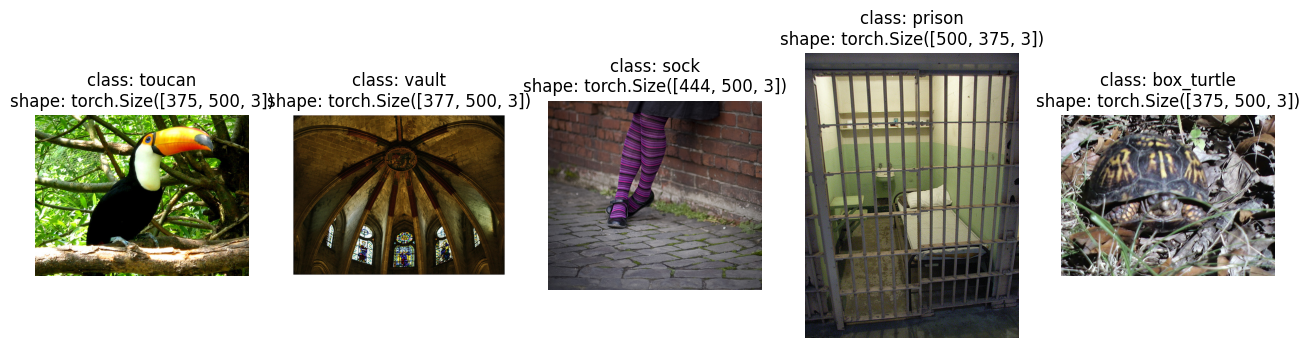

In [3]:
display_random_images(dataset=dataset,
                      classes=dataset.classes,
                      n = 5)